## Using scikit-learn for regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
#generating data
# y  = 200 x1 + 300 x2 + 310 x3 + 500 x4 + 100
m = 1000
x = np.random.rand(m,4)   * 100
w,b = np.array([200,300,310,500]),100
y = x@w + b


#pre processing (feature scalling)
scaler = StandardScaler()
X_norm = scaler.fit_transform(x)


sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(X_norm,y)



SGDRegressor(max_iter=10000)

In [3]:
print(sgdr.coef_)
print(sgdr.intercept_)

[ 5703.72382395  8777.97303122  8878.87962907 14431.29057629]
[65733.13772553]


<font color='red'>The reason why the coeficients look different from the originals (even after convergence) is pre-scaling</font>

In [4]:
x[0]

array([15.79857007, 51.12155939, 97.83542638, 12.21108778])

## Scikit learning - from Youtube
Following stuff are code related to the video <a href="https://www.youtube.com/watch?v=0B5eIE_1vpU">here!</a>

<font color='red'>Following example is without pre-scaling --> Exact coeficients were found!</font>

In [5]:
#generating data
# y  = 200 x1 + 300 x2 + 310  x3 + 500 x4 + 100
m = 100
x = np.random.rand(100,4)   * 100
w,b = np.array([200,300,310,500]),100
y = x@w + b

mod = sklearn.linear_model.LinearRegression()
mod.fit(x,y)

print(mod.coef_)
print(mod.intercept_)




[200. 300. 310. 500.]
99.9999999999709


## Stochastic gradient decent
Following code is related to <a href="https://www.youtube.com/watch?v=4b4MUYve_U8&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=3">this youtube video</a>


w = [ 1.99943376e+02  2.99952481e+02 -5.58229097e-02  4.99975402e+02]
b = 100.59795210061012


<IPython.core.display.Javascript object>


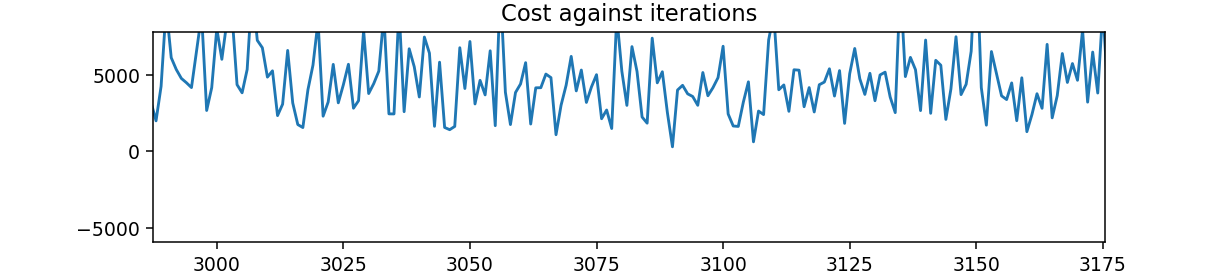

In [6]:
#generating data  ******************************HUGE set of data**********
# y  = 200 x1 + 300 x2 + 0 x3 + 500 x4 + 100
m = 100_000
x = np.random.rand(m,4)   *1
w_true,b_true = np.array([200,300,0,500]),100
y = x@w_true + b_true

#adding noise to the data set
if 1:
    y += np.random.rand(y.shape[0])*1

all_training_data = np.hstack((x,np.array([y]).T))


assert len(y) == m

#implement stochastic gradient decent
iterations = 200_000
lr = 1.0e-3
w=np.zeros(4)
b=0

cost_history = []

for i in range(iterations):
    

    training_data_indices = np.random.choice(10**3,size=5)
    training_data = all_training_data[training_data_indices]
    x_,y_=training_data[:,0:4],training_data[:,4]
    
    cost = np.sum((x_@w+b-y_)**2)/(2*x_.shape[0])
    cost_history.append(cost)
    
    
    for j in range(4):
        w[j] -= lr * np.sum(((x_@w + b)-y_)*(x_[:,j]))/(x_.shape[0])
    b -= lr * np.sum((x_@w + b)-y_)/(x_.shape[0])
    
print(f"w = {w}")
print(f"b = {b}")

%matplotlib nbagg
fig,ax=plt.subplots(1,figsize=(9,2))
ax.plot(cost_history,alpha=1)
plt.title("Cost against iterations")
plt.show()
    
    
    
    

<font color="#ff0000">We can clearly see the cost is going up and down in the beginning. That is because the partial derivatives are calculated by selecting only a small subset of the training data.</font>

When the data set is too large it's better to use the stochastic gradient decent. (It's the standard).\
\
For example consider 1TB of data. It's even unlikely to load that at once to the memory.\
\
Sometimes with SGD we might not find the global minimum but the local minimum we find is fine too for general tasks.(Decreasing the L.r. is also a good thing to do in SGD)